In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import dash
import datetime as dt
from matplotlib.colors import ListedColormap

from dash import dcc
from dash import html
from itertools import chain
from collections import Counter
from dash.dependencies import Input, Output
from sklearn.pipeline import make_pipeline

import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error

In [2]:
delta = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/delta.csv')
del delta['Unnamed: 0']
dfc = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/newdfc.csv')
dfc.index = dfc['Unnamed: 0'].values
del dfc['Unnamed: 0']

dfd = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/newdfd.csv')
dfd.index = dfd['Unnamed: 0'].values
del dfd['Unnamed: 0']

In [3]:
delta

,Afghanistan,Africa,Albania,Algeria,Angola,Argentina,Armenia,Asia,Australia,Austria,...,United Arab Emirates,United Kingdom,United States,Upper middle income,Uruguay,Uzbekistan,Venezuela,World,Zambia,Zimbabwe
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-0.055813,-0.177420,-0.002506,-0.001190,0.000596,-0.002703,-0.020283,0.085274,0.032202,0.340994,...,0.015433,0.027229,0.005771,-0.049463,-0.016309,0.016238,0.011091,0.008966,0.041944,-0.068917
796,0.060438,0.195826,-0.001670,-0.001190,-0.005164,0.000293,0.016180,-0.115761,-0.026508,0.033116,...,-0.005144,0.073068,0.007759,0.020228,-0.002351,-0.025034,0.081032,-0.015628,-0.049145,0.131192
797,-0.088498,-0.192224,0.001253,0.001983,0.000000,-0.003732,0.001367,0.036943,0.019330,-0.002205,...,0.002908,-0.052638,0.002744,-0.034394,-0.000588,0.037889,-0.125849,-0.002485,-0.013141,-0.131192
798,-0.004934,0.089107,-0.000835,-0.002380,0.010725,-0.018798,-0.003874,0.191855,-0.009026,-0.098276,...,-0.006486,-0.332245,-0.030136,-0.045220,-0.020423,-0.020298,0.063151,-0.060885,0.004680,0.056723


In [4]:
maru=max(list(dfc['Russia'].values))
maru

202211.0

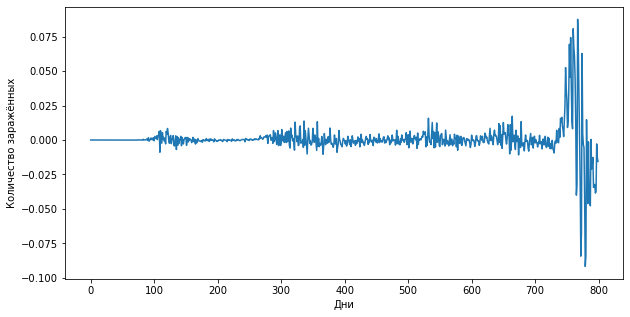

In [5]:
plt.figure(figsize=(10,5))
plt.plot( delta.index,delta['Russia'].values)
plt.xlabel('Дни')
plt.ylabel('Количество заражённых')
plt.show()

In [6]:
list(dfc['Russia'].values)[-1]

43951.0

In [7]:
list(dfc['Russia'].values)[-8:]

[78632.0, 72136.0, 65569.0, 57787.0, 50284.0, 49710.0, 47096.0, 43951.0]

In [60]:
rtf=list(dfc['Russia'].values)
sum(list(delta['Russia'].values)[-7:])/7 # просто среднее по обыным числам

-1.0

In [69]:
sum(list(delta['Russia'].values)[-7:])/7*maru

-4954.428571428563

In [59]:
def moving_average(series, n):
    return np.average(series[-n:])

a = moving_average(delta.Russia, 7)
a = a * (max(dfc['Russia']) - min(dfc['Russia'])) + min(dfc['Russia'])
print(a)

-4954.428571428563


In [9]:
tr=list(dfc['Russia'].values)[-8:-1] # по обычным числовым данным среднее с весами
g=[0.5/7,0.5/7,0.5/7,0.5/7,1/7,2/7,2/7]
s=0
sg=0
for i in range(-1,-8,-1):
    s=s+tr[i]*g[i]
    sg+=g[i]
print(s)

54422.57142857142


In [10]:
trdel=list(delta['Russia'].values)[-8:-1] # по delta среднее с весами
g=[0.5/7,0.5/7,0.5/7,0.5/7,1/7,2/7,2/7]
s=0
sg=0
for i in range(-1,-8,-1):
    s=s+trdel[i]*g[i]
    sg+=g[i]
print(s)
print(s*maru)

-0.019620947567498406
-3967.5714285714203


In [11]:
sum(list(delta['Russia'].values)[-8:-1])/7*maru #по delta среднее

-5496.999999999992

In [23]:
trdel=list(delta['Russia'].values)[-7:]
for i in range(3): # по delta среднее с весами 
    g=[0.6, 0.2, 0.1, 0.07, 0.01, 0.01, 0.01][::-1] # вообше крутые
    s=0
    sg=0
    for i in range(-1,-6,-1):
        s=s+trdel[i]*g[i]
        sg+=g[i]
    print(s*maru)
    trdel.append(s)
print(trdel)

-3070.229999999994
-2847.747999999995
-2825.914799999995
[-0.0321248596762787, -0.0324759780625188, -0.0384845532636701, -0.0371048063656279, -0.0028386190662229, -0.0129270910088966, -0.015553060911622, -0.015183298633605463, -0.014083051861669221, -0.013975079496169817]


In [42]:
def wessr(trdel):
    trdel=trdel[-7:]
     # по delta среднее с весами 
    g=[0.6, 0.2, 0.1, 0.07, 0.01, 0.01, 0.01][::-1] # вообше крутые
    s=0
    sg=0
    for i in range(-1,-6,-1):
        s=s+trdel[i]*g[i]
        sg+=g[i]
    return s
    trdel.append(s)
print(wessr(list(delta['Russia'].values)))

-0.015183298633605463


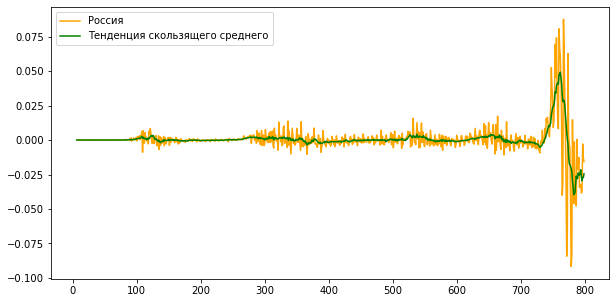

In [47]:
def plotMovingAverage(series, n):

    rolling_mean = series.rolling(window=n).mean()

    plt.figure(figsize=(10,5))
    #plt.title("Moving average\n window size = {}".format(n))
    #plt.plot(rolling_mean, "g", label="Rolling mean trend")

    plt.plot(delta.Russia[n:],c='orange' , label="Россия")
    plt.plot(rolling_mean, "g", label="Тенденция скользящего среднего")
    plt.legend(loc="upper left")
    #plt.grid(True)
plotMovingAverage(delta.Russia, 7)

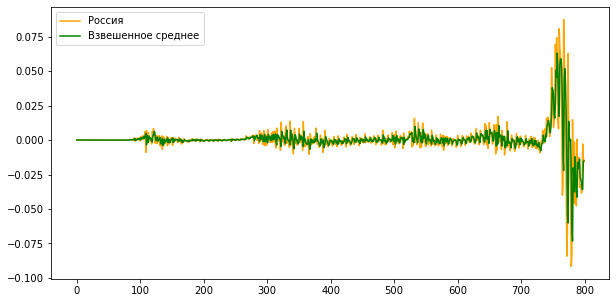

In [51]:
trdel=list(delta['Russia'].values)
trdelpr=[0,0,0,0,0,0,0]
for i in range(7,len(trdel)):
    ex=trdel[:i]
    trdelpr.append(wessr(ex))
plt.figure(figsize=(10,5))
plt.plot(delta.Russia,c='orange' , label="Россия")
plt.plot(trdelpr,c='green' , label="Взвешенное среднее")
plt.legend(loc="upper left")
plt.show()